# Calculate GitHub activity (clones and views)

The data supporting this notebook can be downloaded from:  `/pic/projects/im3/github_activity/github_activity.db`


In [68]:
import os
import sqlite3

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns; sns.set()


In [69]:
def create_connection(db_file):
    """Create a database connection to the SQLite database specified by db_file
    
    :param db_file:       database file
    :return:              connection object or None
    
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)
 
    return conn


### Create a database connection

In [70]:
# this is my local directory
root_dir = '/Users/d3y010/projects/im3_general/github_activity'

# path to the sqlite database
db_file = os.path.join(root_dir, 'github_activity.db')

# create a connection to the SQLite3 database
conn = create_connection(db_file)


### See what my available dates are

In [71]:
df_range = pd.read_sql_query("SELECT MIN(date_time) as min_dt, MAX(date_time) as max_dt FROM clones;", conn)

df_range


,min_dt,max_dt
0,2020-02-06 00:00:00,2021-06-19 00:00:00


### Construct SQL queries

In [72]:
# set date range
start_date = '2019-10-01'
through_date = '2020-09-30'


sql_clones = f"""SELECT repo_name, SUM(uniques) as unique_sum
                 FROM clones
                 WHERE (date_time >= '{start_date}') AND (date_time <= '{through_date}')
                 GROUP BY repo_name
                 ORDER BY SUM(uniques) DESC;
                 """


sql_views = f"""SELECT repo_name, SUM(uniques) as unique_sum
                 FROM views
                 WHERE (date_time >= '{start_date}') AND (date_time <= '{through_date}')
                 GROUP BY repo_name
                 ORDER BY SUM(uniques) DESC;
                 """


### Query into a Pandas DataFrame

In [73]:
with conn:
    df_clones = pd.read_sql_query(sql_clones, conn, parse_dates=['date_time'])
    df_views = pd.read_sql_query(sql_views, conn, parse_dates=['date_time'])

df_clones.head()


,repo_name,unique_sum
0,teleconnect,190
1,population_gravity,120
2,im3agents,111
3,im3py,110
4,burleyson-etal_2020_energy,41


### Plot sum of daily unique clones per repository

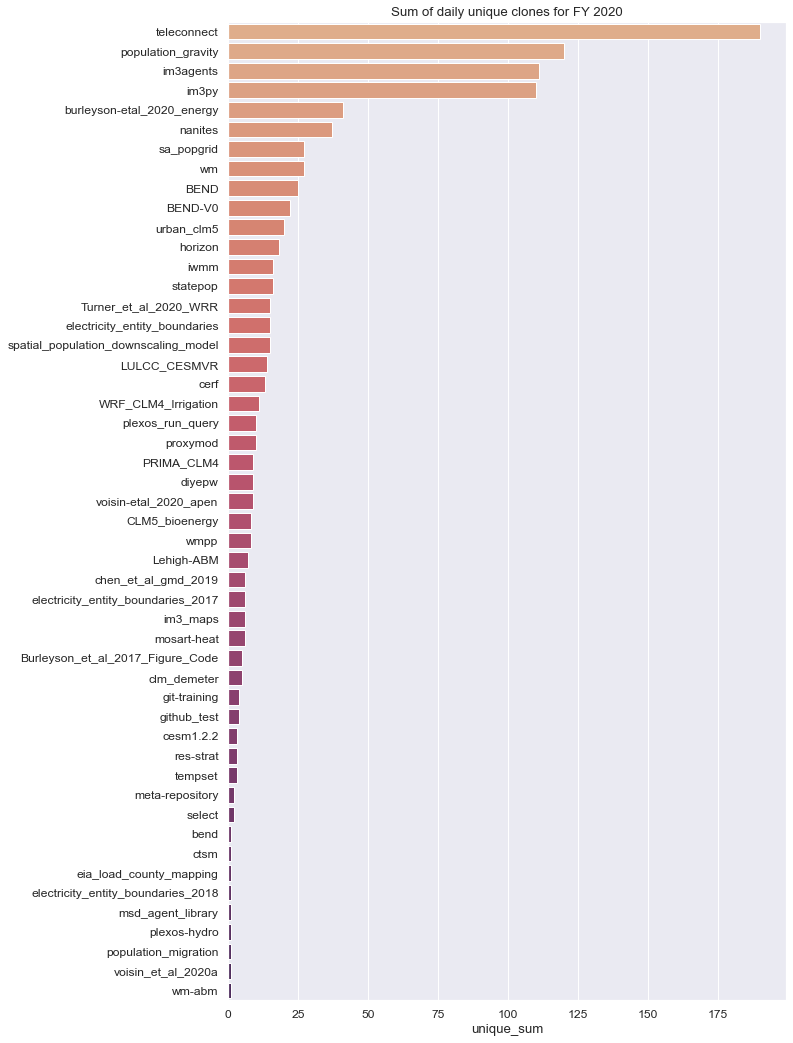

In [74]:
sns.set(font_scale=1.1) 

fig, ax = plt.subplots(figsize=(10, 18))

ax = sns.barplot(x="unique_sum", y="repo_name", data=df_clones, palette="flare")

ax.set(ylabel=None, 
       title=f'Sum of daily unique clones for FY {through_date[:4]}')

sns.set(font_scale=1) 



### Plot sum of daily unique views per repository

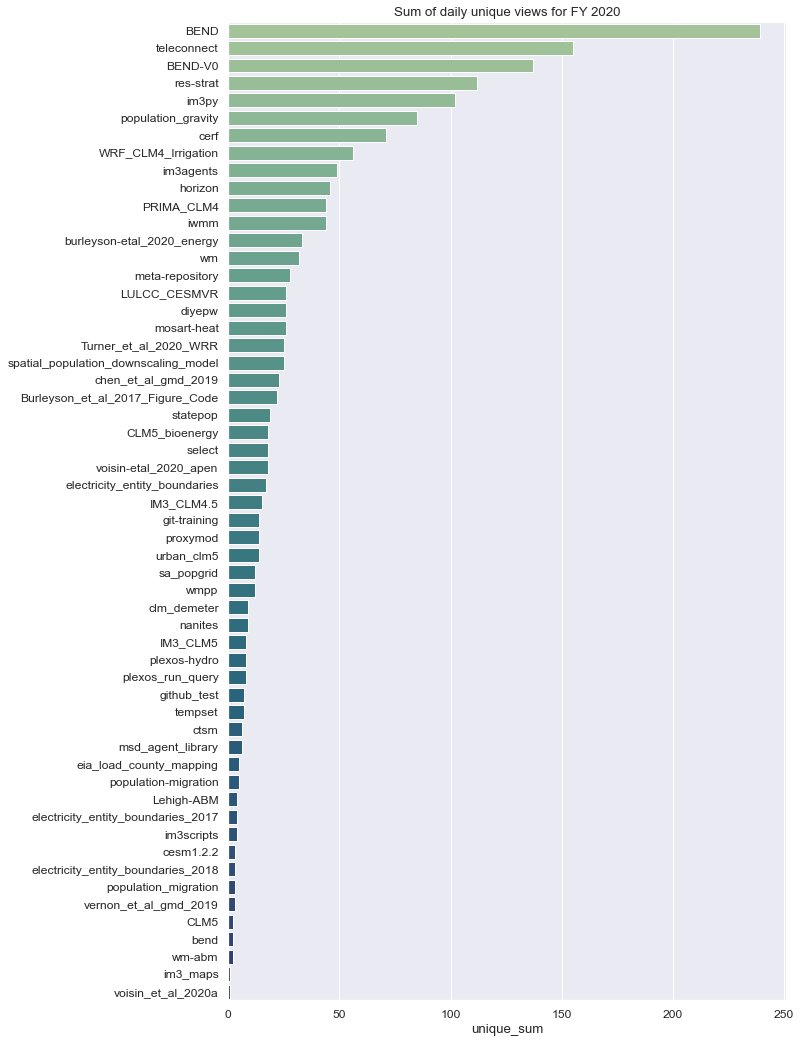

In [75]:
sns.set(font_scale=1.1) 

fig, ax = plt.subplots(figsize=(10, 18))

ax = sns.barplot(x="unique_sum", y="repo_name", data=df_views, palette="crest")

ax.set(ylabel=None, 
       title=f'Sum of daily unique views for FY {through_date[:4]}')

sns.set(font_scale=1) 
